In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from gensim.corpora.dictionary import Dictionary
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
wnl = WordNetLemmatizer()

In [2]:
#  making  corpurs dataset  with four  text  documents
cps1 = 'This is the first public legal document about democratic political system, based on checks and balance, pubIished in 1870.'
cps2 = 'This document is the second academic document on the balance and control of power in democratic nation states pubIished  1880.'
cps3 = 'And this is a document about the roles of legal system, checking and balancing political power, in American  democracy.'
cps4 = 'He wrote a document about economic development in 1979 and pubIished also a book about democracy and economy in 1980.'
cps5 = 'In a document, it is said that democracy might not be helpful for economic development, but economic  development can bring forth democracy.'
cps6 = 'A document said that government investment in infrastructure and education is key for economic development and wealth of nations.'
cps7 = 'This a research document, pubIished in 1963, about the role of education in economic growth and development of nations.'
cps8 = 'My document said that entrepreneurship education has been identified as a key variable needed for fast economic growth and development.'
cps9 = 'History telIs in a document that political stabiIity is one of requirements for economic development and democracy.'
corpus = [cps1, cps2, cps3, cps4, cps5, cps6, cps7, cps8, cps9] #  document   Iist 
corpus_name  =  ['cps1','cps2','cps3','cps4','cps5','cps6','cps7','cps8','cps9']

In [3]:
corpus

['This is the first public legal document about democratic political system, based on checks and balance, pubIished in 1870.',
 'This document is the second academic document on the balance and control of power in democratic nation states pubIished  1880.',
 'And this is a document about the roles of legal system, checking and balancing political power, in American  democracy.',
 'He wrote a document about economic development in 1979 and pubIished also a book about democracy and economy in 1980.',
 'In a document, it is said that democracy might not be helpful for economic development, but economic  development can bring forth democracy.',
 'A document said that government investment in infrastructure and education is key for economic development and wealth of nations.',
 'This a research document, pubIished in 1963, about the role of education in economic growth and development of nations.',
 'My document said that entrepreneurship education has been identified as a key variable need

In [4]:
#Unigram vectorization：ordered alphabetically
corpus2vec1 = CountVectorizer()
unig =  corpus2vec1.fit_transform(corpus) # making document-term  requency matrix 
#print(type(unig),unig.shape, unig)
#print(copus2vec1.get_feature_names()) # coIumn features (unique words in a vector)
#print(corpus2vec1.vocabulary_) # dictionary mapping terms to feature indices
corpusdtx = pd.DataFrame(unig.toarray(), index=corpus_name,
                        columns=corpus2vec1.get_feature_names()) #  document-term frequency matrix
corpusdtx

,1870,1880,1963,1979,1980,about,academic,also,american,and,...,stabiiity,states,system,telis,that,the,this,variable,wealth,wrote
cps1,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
cps2,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,2,1,0,0,0
cps3,0,0,0,0,0,1,0,0,1,2,...,0,0,1,0,0,1,1,0,0,0
cps4,0,0,0,1,1,2,0,1,0,2,...,0,0,0,0,0,0,0,0,0,1
cps5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
cps6,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,1,0,0,0,1,0
cps7,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
cps8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
cps9,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0


In [7]:
#n-gram vectorization
corpus2vec2 = CountVectorizer(stop_words = 'english', ngram_range=(2, 2))


bigram = corpus2vec2.fit_transform(corpus)
#print(corpus2vec2.get_feature_names())
#print(corpus2vec2.vocabulary_)
bigramdtx = pd.DataFrame(bigram.toarray(), index=corpus_name,columns = corpus2vec2.get_feature_names())
bigramdtx
#bigramdtx1 = bigramdtx.drop(['document'], axis = 1)
#bigramdtx1

,1963 role,1979 pubiished,academic document,american democracy,balance control,balance pubiished,balancing political,based checks,book democracy,bring forth,...,said democracy,said entrepreneurship,said government,second academic,stabiiity requirements,states pubiished,telis document,variable needed,wealth nations,wrote document
cps1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
cps2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
cps3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cps4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
cps5,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
cps6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
cps7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cps8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
cps9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [5]:
#Calculating document tf-idf matrix
corpustfidf = TfidfVectorizer(stop_words={'english'}).fit(bigramdtx)
corpustfidfdtx = pd.DataFrame(corpustfidf.transform(corpus).toarray(),index=corpus_name,
                              columns = corpustfidf.get_feature_names()) # document-term matrix
corpustfidfdtx
#print(corpustf idf.vocabulary.)

,1870,1880,1963,1979,1980,academic,american,balance,balancing,based,...,role,roles,said,second,stabiiity,states,telis,variable,wealth,wrote
cps1,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000,0.316228,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cps2,0.000000,0.267261,0.000000,0.000000,0.000000,0.267261,0.000000,0.267261,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.267261,0.000000,0.267261,0.000000,0.000000,0.000000,0.000000
cps3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,...,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cps4,0.000000,0.000000,0.000000,0.316228,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228
cps5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.242536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cps6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.301511,0.000000,0.000000,0.000000,0.000000,0.000000,0.301511,0.000000
cps7,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cps8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.288675,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000,0.000000
cps9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000


1. Singular value decomposition

In [6]:
corpusLsa =  TruncatedSVD(3)
dtm_lsa =  corpusLsa.fit_transform(corpustfidfdtx)
dtm_lsa1 =  Normalizer(copy=False).fit_transform(dtm_lsa)
#U-matrix formation (topic term patrix)
pd.DataFrame(corpusLsa.components_, index = ['topic1','topic2','topic3'], columns = corpustfidf.get_feature_names())

,1870,1880,1963,1979,1980,academic,american,balance,balancing,based,...,role,roles,said,second,stabiiity,states,telis,variable,wealth,wrote
topic1,0.036902,0.035597,0.064924,0.064596,0.064596,0.035597,0.042183,0.072499,0.042183,0.036902,...,0.064924,0.042183,0.168430,0.035597,0.068317,0.035597,0.068317,0.055018,0.059079,0.064596
topic2,0.150029,0.105750,-0.040817,0.001824,0.001824,0.105750,0.124569,0.255778,0.124569,0.150029,...,-0.040817,0.124569,-0.191008,0.105750,0.009460,0.105750,0.009460,-0.074004,-0.076988,0.001824
topic3,-0.080592,-0.100252,-0.106253,0.072876,0.072876,-0.100252,0.110486,-0.180843,0.110486,-0.080592,...,-0.106253,0.110486,-0.082989,-0.100252,0.147592,-0.100252,0.147592,-0.084618,-0.085022,0.072876


In [7]:
print(type(corpusLsa.components_), corpusLsa.components_.shape) #topic-term matrix
print(type(dtm_lsa), dtm_lsa.shape) #documnet-topic matrix
print(corpusLsa.singular_values_) #diabonal elements (singular values) of sigma matrix

<class 'numpy.ndarray'> (3, 53)
<class 'numpy.ndarray'> (9, 3)
[1.83137458 1.19784773 1.01500172]


In [8]:
pd.DataFrame(dtm_lsa, index = corpus, columns = ['topic1','topic2','topic3'])

,topic1,topic2,topic3
"This is the first public legal document about democratic political system, based on checks and balance, pubIished in 1870.",0.472707,0.822184,-0.317114
This document is the second academic document on the balance and control of power in democratic nation states pubIished 1880.,0.545257,0.692967,-0.471690
"And this is a document about the roles of legal system, checking and balancing political power, in American democracy.",0.555270,0.701499,0.446738
He wrote a document about economic development in 1979 and pubIished also a book about democracy and economy in 1980.,0.944811,0.011414,0.327416
"In a document, it is said that democracy might not be helpful for economic development, but economic development can bring forth democracy.",0.864108,-0.272261,0.423311
A document said that government investment in infrastructure and education is key for economic development and wealth of nations.,0.814811,-0.454252,-0.360193
"This a research document, pubIished in 1963, about the role of education in economic growth and development of nations.",0.868727,-0.233649,-0.436716
My document said that entrepreneurship education has been identified as a key variable needed for fast economic growth and development.,0.802104,-0.461559,-0.378937
History telIs in a document that political stabiIity is one of requirements for economic development and democracy.,0.832211,0.049301,0.552263


In [9]:
#documents similarity using LSA
similarity = np.asarray(np.asmatrix(dtm_lsa).dot(np.asmatrix(dtm_lsa).T))
similaritydf = pd.DataFrame(similarity, index=corpus_name, columns=corpus_name)
#similaritydf
similaritydf[similaritydf > 0.68]

,cps1,cps2,cps3,cps4,cps5,cps6,cps7,cps8,cps9
cps1,1.000000,0.977073,0.697574,NaN,NaN,NaN,NaN,NaN,NaN
cps2,0.977073,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cps3,0.697574,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.743403
cps4,NaN,NaN,NaN,1.000000,0.951910,NaN,NaN,NaN,0.967665
cps5,NaN,NaN,NaN,0.951910,1.000000,NaN,NaN,NaN,0.939476
cps6,NaN,NaN,NaN,NaN,NaN,1.000000,0.971286,0.999717,NaN
cps7,NaN,NaN,NaN,NaN,NaN,0.971286,1.000000,0.970140,NaN
cps8,NaN,NaN,NaN,NaN,NaN,0.999717,0.970140,1.000000,NaN
cps9,NaN,NaN,0.743403,0.967665,0.939476,NaN,NaN,NaN,1.000000


2. LSA with gensim library

In [10]:
mystpwd = stopwords.words('english')
print(mystpwd[-5:])
print(len(mystpwd), type(mystpwd))
print('document' in mystpwd)
stpwd_added=['key']
mystpwd.extend(stpwd_added)
print('document' in mystpwd, len(mystpwd))
print(mystpwd[-5:])

["weren't", 'won', "won't", 'wouldn', "wouldn't"]
179 <class 'list'>
False
False 180
['won', "won't", 'wouldn', "wouldn't", 'key']


In [11]:
tokenizer = RegexpTokenizer('\w+') 
en_stop = mystpwd
p_stemmer = PorterStemmer()
texts=[] #unique word Iist by documents for i in  corpus:
for i in corpus:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens =  [i for i in tokens if not i in en_stop]
    #stemmed-tokens  =  [p_stemmer.stem(i) for i in stopped_tokens]
    lemmatized_words  =  [wnl.lemmatize(i) for i in stopped_tokens]
    #texts, append (stemmed_tokens)
    texts.append(lemmatized_words)
#print(texts)
for i in range(len(texts)) :
    print(f'{corpus_name[i]}：{texts[i]}')

cps1：['first', 'public', 'legal', 'document', 'democratic', 'political', 'system', 'based', 'check', 'balance', 'pubiished', '1870']
cps2：['document', 'second', 'academic', 'document', 'balance', 'control', 'power', 'democratic', 'nation', 'state', 'pubiished', '1880']
cps3：['document', 'role', 'legal', 'system', 'checking', 'balancing', 'political', 'power', 'american', 'democracy']
cps4：['wrote', 'document', 'economic', 'development', '1979', 'pubiished', 'also', 'book', 'democracy', 'economy', '1980']
cps5：['document', 'said', 'democracy', 'might', 'helpful', 'economic', 'development', 'economic', 'development', 'bring', 'forth', 'democracy']
cps6：['document', 'said', 'government', 'investment', 'infrastructure', 'education', 'economic', 'development', 'wealth', 'nation']
cps7：['research', 'document', 'pubiished', '1963', 'role', 'education', 'economic', 'growth', 'development', 'nation']
cps8：['document', 'said', 'entrepreneurship', 'education', 'identified', 'variable', 'needed', 

In [12]:
dictionary = Dictionary(texts) # a token id for each unique word and mapping between token id and numbers
print(dictionary.token2id)
print(dictionary[44])
print(dictionary.token2id['document'])

{'1870': 0, 'balance': 1, 'based': 2, 'check': 3, 'democratic': 4, 'document': 5, 'first': 6, 'legal': 7, 'political': 8, 'pubiished': 9, 'public': 10, 'system': 11, '1880': 12, 'academic': 13, 'control': 14, 'nation': 15, 'power': 16, 'second': 17, 'state': 18, 'american': 19, 'balancing': 20, 'checking': 21, 'democracy': 22, 'role': 23, '1979': 24, '1980': 25, 'also': 26, 'book': 27, 'development': 28, 'economic': 29, 'economy': 30, 'wrote': 31, 'bring': 32, 'forth': 33, 'helpful': 34, 'might': 35, 'said': 36, 'education': 37, 'government': 38, 'infrastructure': 39, 'investment': 40, 'wealth': 41, '1963': 42, 'growth': 43, 'research': 44, 'entrepreneurship': 45, 'fast': 46, 'identified': 47, 'needed': 48, 'variable': 49, 'history': 50, 'one': 51, 'requirement': 52, 'stabiiity': 53, 'telis': 54}
research
5


In [13]:
print(dictionary.cfs, end=' ') #token id and its frequencty in a corpus.
print(sorted(dictionary.cfs.items()), end = ' ')

{6: 1, 10: 1, 7: 2, 5: 10, 4: 2, 8: 3, 11: 2, 2: 1, 3: 1, 1: 2, 9: 4, 0: 1, 17: 1, 13: 1, 14: 1, 16: 2, 15: 3, 18: 1, 12: 1, 23: 2, 21: 1, 20: 1, 19: 1, 22: 5, 31: 1, 29: 7, 28: 7, 24: 1, 26: 1, 27: 1, 30: 1, 25: 1, 36: 3, 35: 1, 34: 1, 32: 1, 33: 1, 38: 1, 40: 1, 39: 1, 37: 3, 41: 1, 44: 1, 42: 1, 43: 2, 45: 1, 47: 1, 49: 1, 48: 1, 46: 1, 50: 1, 54: 1, 53: 1, 51: 1, 52: 1} [(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 10), (6, 1), (7, 2), (8, 3), (9, 4), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 3), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 5), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 7), (29, 7), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 3), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)] 

In [14]:
docfreq = dictionary.dfs
print(docfreq, end='') #document frequency with a token
print(sorted(docfreq.items()), end = ' ')
print( {k: v for k, v in sorted(docfreq.items(), key = lambda x: x[1], reverse = True)})
print(max(docfreq.items(), key = lambda x : x[1]))

{6: 1, 10: 1, 7: 2, 5: 9, 4: 2, 8: 3, 11: 2, 2: 1, 3: 1, 1: 2, 9: 4, 0: 1, 17: 1, 13: 1, 14: 1, 16: 2, 15: 3, 18: 1, 12: 1, 23: 2, 21: 1, 20: 1, 19: 1, 22: 4, 31: 1, 29: 6, 28: 6, 24: 1, 26: 1, 27: 1, 30: 1, 25: 1, 36: 3, 35: 1, 34: 1, 32: 1, 33: 1, 38: 1, 40: 1, 39: 1, 37: 3, 41: 1, 44: 1, 42: 1, 43: 2, 45: 1, 47: 1, 49: 1, 48: 1, 46: 1, 50: 1, 54: 1, 53: 1, 51: 1, 52: 1}[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 9), (6, 1), (7, 2), (8, 3), (9, 4), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 3), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 4), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 6), (29, 6), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 3), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)] {5: 9, 29: 6, 28: 6, 9: 4, 22: 4, 8: 3, 15: 3, 36: 3, 37: 3, 7: 2, 4: 2, 11: 2, 1: 2, 16: 2, 23: 2, 43: 2, 6: 1, 10: 1, 2: 1, 3: 1, 0: 1, 1

In [15]:
docfreq_sr = pd.Series(docfreq, index = docfreq.keys())
docfreq_sr[docfreq_sr>4]

5     9
29    6
28    6
dtype: int64

In [16]:
#removing common words across all documents
dictionary.filter_n_most_frequent(1)
len(dictionary)
print(dictionary.token2id)

{'1870': 0, 'balance': 1, 'based': 2, 'check': 3, 'democratic': 4, 'first': 5, 'legal': 6, 'political': 7, 'pubiished': 8, 'public': 9, 'system': 10, '1880': 11, 'academic': 12, 'control': 13, 'nation': 14, 'power': 15, 'second': 16, 'state': 17, 'american': 18, 'balancing': 19, 'checking': 20, 'democracy': 21, 'role': 22, '1979': 23, '1980': 24, 'also': 25, 'book': 26, 'development': 27, 'economic': 28, 'economy': 29, 'wrote': 30, 'bring': 31, 'forth': 32, 'helpful': 33, 'might': 34, 'said': 35, 'education': 36, 'government': 37, 'infrastructure': 38, 'investment': 39, 'wealth': 40, '1963': 41, 'growth': 42, 'research': 43, 'entrepreneurship': 44, 'fast': 45, 'identified': 46, 'needed': 47, 'variable': 48, 'history': 49, 'one': 50, 'requirement': 51, 'stabiiity': 52, 'telis': 53}


In [17]:
doc_term_matrix = [dictionary.doc2bow(i) for i in texts] # term document frequency table
for i in range(len(doc_term_matrix)):
    print(f'{corpus_name[i]}:{doc_term_matrix[i]}')

cps1:[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
cps2:[(1, 1), (4, 1), (8, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]
cps3:[(6, 1), (7, 1), (10, 1), (15, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]
cps4:[(8, 1), (21, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]
cps5:[(21, 2), (27, 2), (28, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)]
cps6:[(14, 1), (27, 1), (28, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]
cps7:[(8, 1), (14, 1), (22, 1), (27, 1), (28, 1), (36, 1), (41, 1), (42, 1), (43, 1)]
cps8:[(27, 1), (28, 1), (35, 1), (36, 1), (42, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)]
cps9:[(7, 1), (21, 1), (27, 1), (28, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)]


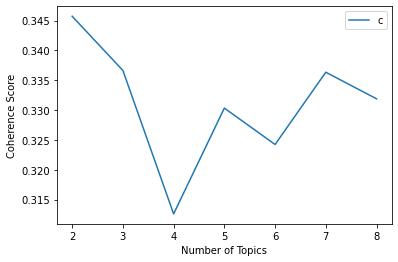

In [18]:
##time
coherence_values = []
model_list = []
for n_topics in range(2,9,1):
    model = models.LsiModel(doc_term_matrix, num_topics = n_topics, id2word = dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
    coherence_values.append(coherencemodel.get_coherence())
    
x = range(2,9,1)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'),loc = 'best')
plt.show()

In [19]:
print(coherence_values)

[0.3457131238562676, 0.33662687853303713, 0.3126045231683548, 0.3303304243987072, 0.3242313359447831, 0.33633864829345006, 0.33188348415631774]


3. LDA model with gensim

In [20]:
num_tps = 10
ldaModel = models.ldamodel.LdaModel(corpus=doc_term_matrix, num_topics = num_tps, id2word = dictionary, 
                                    passes=15, alpha = 'symmetric', iterations = 5)
ldaTopics = ldaModel.print_topics(num_topics = num_tps, num_words = 5)
print(ldaTopics)
for i in range(num_tps):
    print(f'Topic {ldaTopics[i][0]+1}: {ldaTopics[i][1]}')
coherencelda = CoherenceModel(model = ldaModel, texts = texts, dictionary = dictionary, coherence = 'c_v')
coherencelda.get_coherence()

[(0, '0.067*"political" + 0.067*"democratic" + 0.067*"pubiished" + 0.067*"balance" + 0.067*"1870"'), (1, '0.019*"economic" + 0.019*"development" + 0.019*"democracy" + 0.019*"pubiished" + 0.019*"role"'), (2, '0.019*"democracy" + 0.019*"economic" + 0.019*"development" + 0.019*"pubiished" + 0.019*"balance"'), (3, '0.071*"democracy" + 0.071*"development" + 0.071*"economic" + 0.071*"pubiished" + 0.071*"wrote"'), (4, '0.094*"nation" + 0.094*"education" + 0.064*"pubiished" + 0.063*"growth" + 0.055*"economic"'), (5, '0.096*"power" + 0.096*"balancing" + 0.096*"checking" + 0.096*"american" + 0.096*"system"'), (6, '0.098*"democracy" + 0.098*"role" + 0.097*"political" + 0.075*"development" + 0.075*"economic"'), (7, '0.147*"development" + 0.146*"economic" + 0.106*"democracy" + 0.095*"said" + 0.056*"forth"'), (8, '0.019*"economic" + 0.019*"development" + 0.019*"education" + 0.019*"said" + 0.019*"nation"'), (9, '0.130*"investment" + 0.129*"government" + 0.123*"infrastructure" + 0.023*"wealth" + 0.013

0.29035438890041054

In [21]:
#ropic distribution for documents
for i in range(len(doc_term_matrix)):
    print(ldaModel[doc_term_matrix[i]])

[(0, 0.9249979)]
[(4, 0.9181741)]
[(0, 0.010001933), (1, 0.010000038), (2, 0.010000038), (3, 0.0100006815), (4, 0.010000216), (5, 0.61005074), (6, 0.30994496), (7, 0.010001274), (8, 0.010000038), (9, 0.010000037)]
[(3, 0.91804826)]
[(7, 0.9249978)]
[(0, 0.010000051), (1, 0.010000051), (2, 0.010000051), (3, 0.010000614), (4, 0.27185515), (5, 0.010000051), (6, 0.010000752), (7, 0.34648585), (8, 0.010000051), (9, 0.31165734)]
[(0, 0.010000582), (1, 0.010000046), (2, 0.010000046), (3, 0.010001295), (4, 0.5070103), (5, 0.010000046), (6, 0.4129853), (7, 0.010002304), (8, 0.010000046), (9, 0.010000046)]
[(4, 0.91298735), (7, 0.0142836915)]
[(0, 0.010000216), (1, 0.0100000305), (2, 0.0100000305), (3, 0.010000786), (4, 0.010000551), (5, 0.01000003), (6, 0.9099197), (7, 0.010078655), (8, 0.0100000305), (9, 0.01000003)]


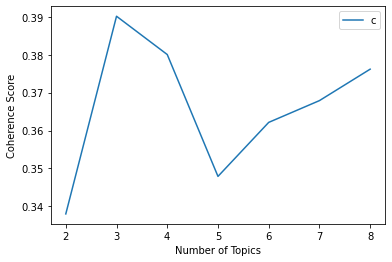

In [22]:
##time
coherence_values = []
model_list = []
for n_topics in range(2,9,1):
    model = models.ldamodel.LdaModel(corpus=doc_term_matrix, num_topics = num_tps, id2word = dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary = dictionary, coherence = 'c_v')
    coherence_values.append(coherencemodel.get_coherence())
    
x = range(2,9,1)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'),loc = 'best')
plt.show()

In [23]:
ldaModel = models.ldamodel.LdaModel(corpus=doc_term_matrix, num_topics = num_tps, id2word = dictionary, 
                                    passes=15, alpha = 'symmetric', iterations = 5)

In [26]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldaModel, corpus=doc_term_matrix, dictionary = ldaModel.id2word)
#pyLDAvis.save_html(vis, 'data/cIass_sample.htmI’)
pyLDAvis.display(vis)

4. TP AI pilot

In [ ]:
#TP AI case sample - Reading text data.
doc1 = open('data/tpai/1.txt','r').read()
doc2 = open('data/tpai/2.txt','r').read()
doc3 = open('data/tpai/3.txt','r').read()
aicorpus = [doc1, doc2, doc3]

In [ ]:
doc2vec = CountVectorizer(stop_words = 'english', max_features = 100)
f2 = doc2vec.fit_transform(aicorpus)
f2.toarray()
print(type(f2), f2.shape)
#doc2vec[0, :]
#print(doc2vec.vocabulary_)

In [ ]:
doc2tfidf = TfidVectorizer(stop_words = 'english', max_features = 100).fit(aicorpus)
doc2tfidfx = pd.DataFrame(doc2tfidf.transform(aicorpus).toarray(), index = ['doc1','doc2','doc3'],
                         columns = doc2tfidf.get_feature_names()) # document-term matrix
print(doc2tfidfx)
#print(tfidfv.vocabulary_)

In [ ]:
doc2Lsa = TruncatedSVD(n_componen ts=2)
doc2_lsa = doc2Lsa.fit_transform(doc2tfidfx)
doc2_lsa1 = Normalizer(copy=False).fit_transform(doc2_lsa) 
pd.DataFrame(doc2Lsa.components_, index = ['topic1','topic2'],
             columns = doc2tfidf.get_feature_names())

In [ ]:
pd.DataFrame(doc2lsa, index = ['doc1','doc2','doc3'], columns = ['topic1','topic2'])

In [ ]:
#Documents similarity using LSA
similarity = np.asarray(np.asmatrix(doc2_lsa).dot(np.asmatrix(doc2_lsa).T))
pd.DataFrame(similarity, index=['doc1','doc2','doc3'], columns = ['doc1','doc2','doc3'])

In [ ]:
pip install --upgrade ipykernel